# Содержание


- [Создание и обучение модели](#3)
    - [Подготовка данных для обучения](#31)
    - [Обучение моделей](#33)
        - [Метод опорных векторов](#332)

# Создание и обучение модели <a id="3"></a>

На этом шаге происходит обучение модели. Обучение моделей машинного обучения происходит итерационно - пробуются различные модели, перебираются гиперпараметры, сравниваются значения выбранной метрики и выбирается лучшая комбинация.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("cleaned_dataset.csv", index_col=0)

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,0,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,0,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,0,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,0,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0


## Подготовка данных для обучения <a id="31"></a>

Вначале нужно определить, на каких данных будет обучаться модель, а на каких тестироваться. **Традиционный подход** - это разделение исходного набора данных на 3 части (обучение, валидация и тестирование) с пропорции 60/20/20. В данном случае обучающая выборка используется для обучения модели, а валидация и тестирование для получения значения метрики без эффекта переобучения.

Однако существует и другой подход к разбиению данных - разделение на 2 части (обучение и тестирование) по правилу 80-20 (80% тренировочный, 20% тестовый). Зачастую данный метод применяется в тех случаях, когда отсутствует достаточное количество данных как в обучающем, так и в проверочном наборе.  

Перед тем как начать разбивать данные необходимо выделить из исходного набора данных целевую переменную (столбец `DRK_YN`) и сохранить её в отдельную переменную. Ниже приведён код разделения:

In [4]:
x = df.drop(columns=["DRK_YN"], axis=1)
y = df["DRK_YN"]

В ходе выполнения данной работы будет использован подход с разделением исходной выборки на 2 части с пропорцией 80-20, поскольку данный способ является самым популярным способом разбиения данных. Для того, чтобы разбить данные таким образом, существует специальный метод `train_test_split` в библиотеке `scikit-learn`.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Метод опорных векторов <a id="332"></a>

Ещё одним мощным и широко используемым алгоритмом обучения является **метод опорных векторов** *(Support Vector Machine - SVM)*, который можно считать расширением персептрона. Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость, разделяющую объекты выборки оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.

Зазор определяется как расстояние между разделяющей гиперплоскостью (границей решений) и ближайшими к этой гиперплоскости обучающими образцами, которые называются *опорными векторами*.

Логическое обоснование наличия границ решений с широкими зазорами заключается в том, что такие модели обычно имеют меньшую ошибку обобщения, тогда как модели с маленькими зазорами больше предрасположены к переобучению. Чтобы получить представления о доведении до максимума зазора, необходимо пристальнее взглянуть на те положительные и отрицательные гиперплоскости, которые параллельны границе решений и могут быть выражены следующим образом:
$$w_0 + w^Tx_{положительная} = 1$$
$$w_0 + w^Tx_{отрицательная} = -1$$
Если вычесть одно уравнение из другого, то получится следующее:
$$w^T(x_{положительная} - x_{отрицательная}) = 2$$
Теперь можно нормализовать это уравнение по длине вектора $w$, которая определяется как:
$$||w|| = \sqrt{\sum_{j=1}^{m}w_j^2}$$
В итоге получается следующее уравнение:
$$\frac{w^T(x_{положительная} - x_{отрицательная})}{||w||} = \frac{2}{||w||}$$

Левую часть последнего уравнения можно интерпретировать как расстояние между положительной и отрицательной гиперплоскостями (зазор), подлежащий доведению до максимума. Теперь целевой функцией SVM становится доведение до максимума зазора путем максимизации $\frac{2}{||w||}$ при условии корректной классификации образцов, что может быть записано следующим образом:
$$w_0 + w^Tx^i \geq 1, \qquad \textit{если} \ \ y^i = 1$$
$$w_0 + w^Tx^i \leq -1, \qquad \textit{если} \ \ y^i = -1$$
$$для \ \  i = 1...N$$

Два приведённых уравнения по существу говорят о том, что все образцы отрицательного класса должны находится с одной стороны отрицательной гиперплоскости, а все образцы положительного класса быть позади положительной гиперплоскости, что можно записать более компактно:
$$y^i (w_0 + w^Tx^i) \geq 1 \quad \forall i$$

Перед началом реализации данной модели необходимо импортировать все требуемые библиотеки:

In [6]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import chime
%load_ext chime 

Далее, также как и в предыдущий раз, создадим конвейер из двух составляющих: стандартизатора и самого классификатора.

In [7]:
# Создаем стандартизатор
standardizer = StandardScaler()

# Создаем классификатор
svm = LinearSVC(max_iter=10000)

# Создаём конвейер
pipe = Pipeline([("standardizer", standardizer), ("svm", svm)])

Затем, определим гиперпараметры, от которых зависит классификатор и которые будут перебираться в процессе кросс-валидации:  

In [8]:
params = {
        "svm__tol": np.arange(1e-6, 1e-2, 5e-3),
        "svm__C": np.arange(0.5, 2),
        "svm__loss": ['hinge', 'squared_hinge']
    }


Запустим процесс кросс-валидации и выведем наилучшую комбинацию гиперпараметров для данного классификатора:

In [9]:
%%time
%%chime
svm_classifier = HalvingGridSearchCV(
    estimator=pipe, 
    param_grid=params,
    factor=3,
    cv=5, verbose=1, 
    n_jobs=-3, 
    scoring="roc_auc").fit(
    x_train, y_train
)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 264349
max_resources_: 793048
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 264349
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 3
n_resources: 793047
Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CPU times: total: 46min 4s
Wall time: 3h 38min 21s


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


После завершения подбора параметров посмотрим на наилучшую их комбинацию, а также наилучшую оценку, полученную на тренировочных данных:

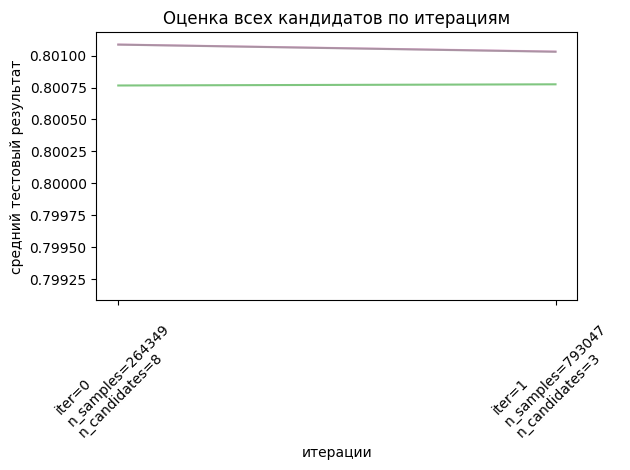

In [10]:
results = pd.DataFrame(svm_classifier.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)
labels = [
    f"iter={i}\nn_samples={svm_classifier.n_resources_[i]}\nn_candidates={svm_classifier.n_candidates_[i]}"
    for i in range(svm_classifier.n_iterations_)
]
ax.set_xticks(range(svm_classifier.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Оценка всех кандидатов по итерациям")
ax.set_ylabel("средний тестовый результат")
ax.set_xlabel("итерации")
plt.tight_layout()
plt.show()

In [11]:
print(
    f"Оптимальные параметры: {svm_classifier.best_params_}\nНаилучшая оценка: {svm_classifier.best_score_}"
)

Оптимальные параметры: {'svm__C': 1.5, 'svm__loss': 'squared_hinge', 'svm__tol': 0.005001}
Наилучшая оценка: 0.8010315672219687


Оптимальные параметры: {'svm__C': 1.5, 'svm__loss': 'squared_hinge', 'svm__tol': 1e-06}

Из полученных данных видно, что точность на тестовых данных ненамного лучше у SVM-модели, чем у KNN.